In [1]:
print("hello")

hello


In [15]:
import pandas as pd

In [16]:
df = pd.read_csv(r"C:\Users\91915\Desktop\superstore sales prj\superstoredataset.csv", encoding="latin1")


In [17]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')


In [18]:
df = df.dropna(subset=['Order Date', 'Ship Date', 'Sales', 'Profit'])


In [14]:
df.to_csv("superstore_clean.csv", index=False)

In [19]:
pip install matplotlib


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 3.2 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/8.1 MB 2.7 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/8.1 MB 2.7 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/8.1 MB 2.7 MB/s eta 0:00:03
   ----- ---------------------------------- 1.0/8.1 MB 967.8 kB/s eta 0:00:08
   ----- ---------------------------------- 1.0/8.1 MB 967.8 kB/s eta 0:00:08
   ------ --------------------------------- 1.3/8.1 MB 809.4 kB/s eta 0:00:09
   ------ --------------------------------- 1.3/8.1 MB 809.4 kB/s eta 0:00:09
   ------- -------------------------------- 1.6/8.1 MB 742.4 kB/s eta 0:00:09
   ------- -------------------------------- 1.6/8.1 MB 742.4 kB/s eta 0:00:09
   --------- ------------------------------ 1.8/8.1 MB 720.6 kB/s eta 0:00:09
   --------- ------------------------------ 1.8/8.1 MB 720.6 kB/s eta 0:00:09
   

In [20]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [21]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [22]:
import seaborn as sys

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sys
df = pd.read_csv(r"C:\Users\91915\Desktop\superstore sales prj\superstoredataset.csv", encoding="latin1")
print(df.head())
print(df.info())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [2]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [3]:
df = df.drop_duplicates()

In [4]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')


In [5]:
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')

In [6]:
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Quarter'] = df['Order Date'].dt.to_period('Q')
df['Profit Margin'] = df['Profit'] / df['Sales']


In [7]:
df.to_csv("Superstore_superclean.csv", index=False)
print("Data cleaned and saved as Superstore_superclean.csv")

Data cleaned and saved as Superstore_superclean.csv


In [8]:
yearly_sales = df.groupby('Order Year')[['Sales','Profit']].sum()
print(yearly_sales)

                Sales      Profit
Order Year                       
2014        484247.56  49543.9741
2015        470532.46  61618.6037
2016        609205.86  81795.1743
2017        733215.19  93439.2696


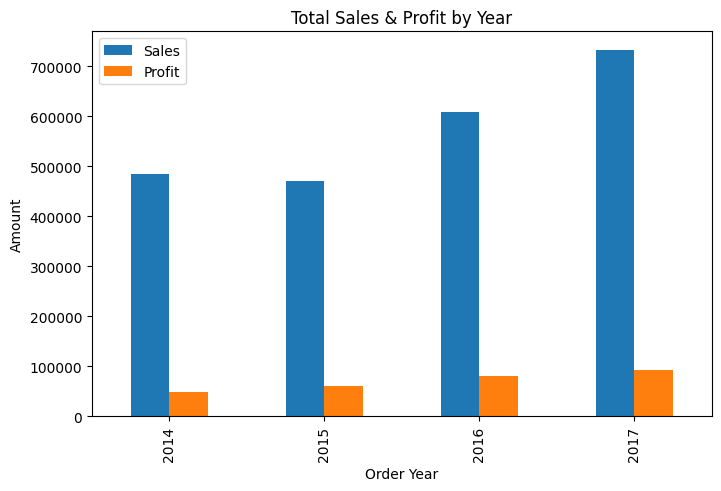

In [9]:
yearly_sales.plot(kind='bar', figsize=(8,5))
plt.title("Total Sales & Profit by Year")
plt.ylabel("Amount")
plt.show()

In [10]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
print(top_products)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.83
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.38
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.48
HON 5400 Series Task Chairs for Big and Tall                                   21870.57
GBC DocuBind TL300 Electric Binding System                                     19823.48
GBC Ibimaster 500 Manual ProClick Binding System                               19024.50
Hewlett Packard LaserJet 3310 Copier                                           18839.68
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.90
GBC DocuBind P400 Electric Binding System                                      17965.07
High Speed Automatic Electric Letter Opener                                    17030.31
Name: Sales, dtype: float64


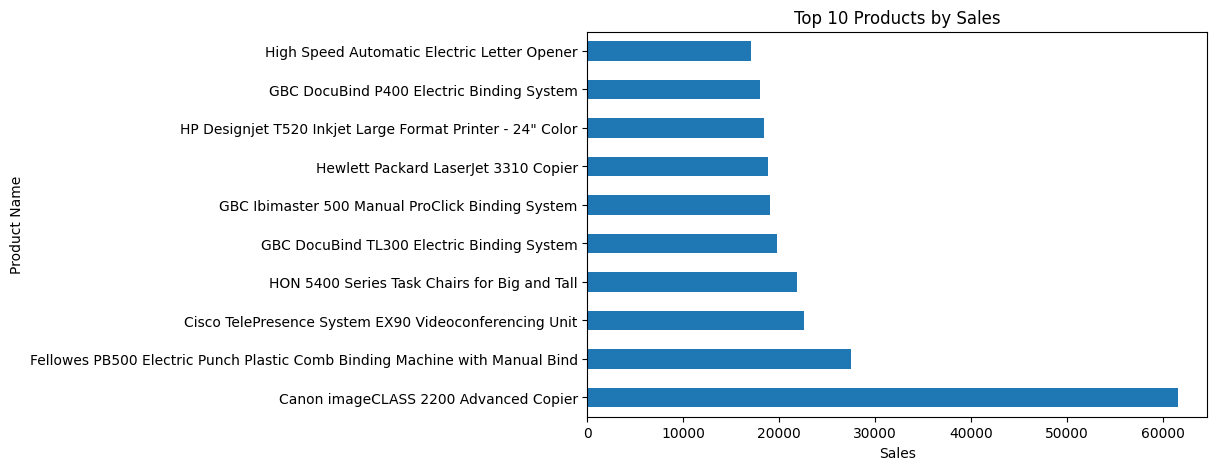

In [11]:
top_products.plot(kind='barh', figsize=(8,5))
plt.title("Top 10 Products by Sales")
plt.xlabel("Sales")
plt.show()

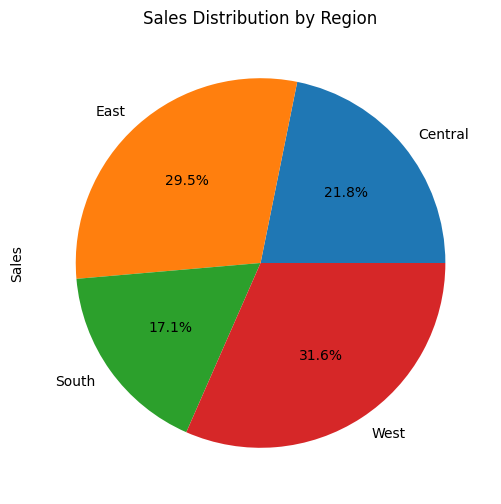

In [12]:
region_sales = df.groupby('Region')['Sales'].sum()
region_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Sales Distribution by Region")
plt.show()

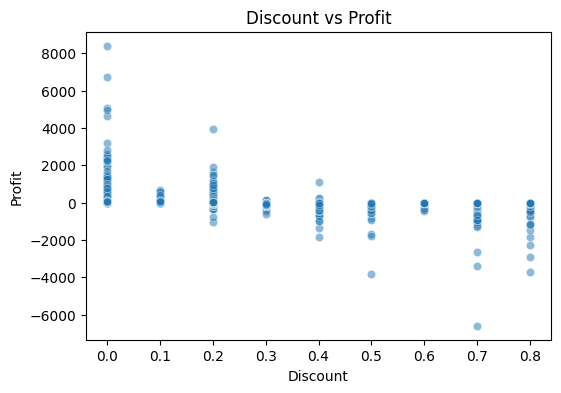

In [14]:
plt.figure(figsize=(6,4))
sys.scatterplot(x='Discount', y='Profit', data=df, alpha=0.5)
plt.title("Discount vs Profit")
plt.show()